### Example:
- Which models use for training
- Comparison of selected models
- How is model performance

In [ ]:
#download the processed_df after we are done preprocessing
!gdown --id 1XmOSG06_mBe8qzoYIepSRfGYW_p0DGjj

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1XmOSG06_mBe8qzoYIepSRfGYW_p0DGjj
To: /content/processed_data.csv
100% 5.86M/5.86M [00:00<00:00, 33.1MB/s]


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('processed_data.csv')

In [ ]:
df.head(3)

,neighbourhood_group,instant_bookable,cancellation_policy,room_type,construction_year,minimum_nights,number_of_reviews,review_rate_number,availability_365,total_price
0,Brooklyn,0,strict,Private_room,2020,10,9,4.0,286,1159.0
1,Manhattan,0,moderate,Entire_home_or_apt,2007,30,45,4.0,228,170.0
2,Manhattan,1,flexible,Private_room,2005,3,0,5.0,352,744.0


One-hot encoding categorical variables

In [ ]:
# Define the categorical features
categorical_features = ['neighbourhood_group', 'cancellation_policy', 'room_type']

# Initialize the OneHotEncoder and ColumnTransformer
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder='passthrough')

In [ ]:
# Split data into features (X) and target (y)
X = df.drop(columns=['total_price'])
y = df['total_price']

In [ ]:
# Fit and transform the data
X_transformed = transformer.fit_transform(df)

# Split data into features (X) and target (y)
X = df.drop(columns=['total_price'])
y = df['total_price']

# Split the transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, df['instant_bookable'], test_size=0.2, random_state=42)

In [ ]:
# Initialize the Linear Regression Model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')


Mean Squared Error: 5.268172421026526e-31
R-squared Score: 1.0


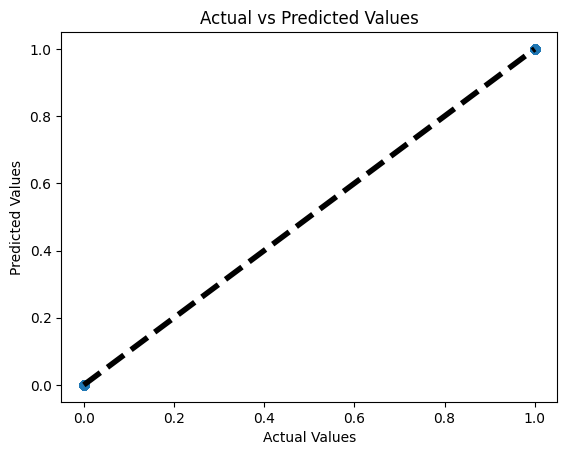

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test contains the actual values and y_pred contains the predicted values
plt.scatter(y_test, y_pred)

# Create a line that goes from the smallest to the largest value of y_test
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=4)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

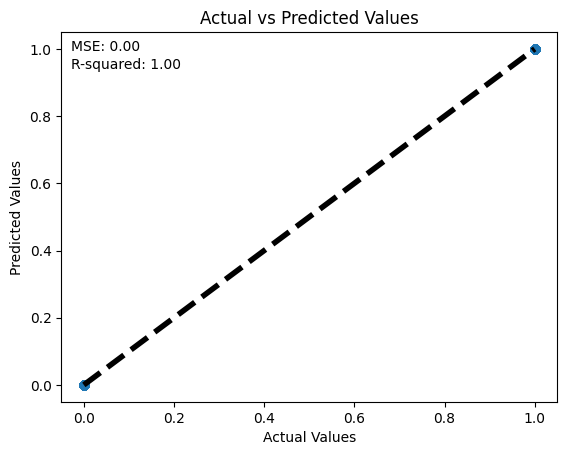

In [ ]:
plt.scatter(y_test, y_pred)

# Create a line that goes from the smallest to the largest value of y_test
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=4)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Add the evaluation metrics as text annotations
plt.text(0.02,  0.95, f'MSE: {mse:.2f}', transform=plt.gca().transAxes)
plt.text(0.02,  0.90, f'R-squared: {r2:.2f}', transform=plt.gca().transAxes)

plt.show()

Linear Regression is our model of choice in tackling this problem due to the nature of the dataset. It is highly effective due to the
reasons listed below:

Using a linear regression model to develop a predictive model for Airbnb listing prices can be particularly effective due to several reasons related to the nature of the data, the goals of the analysis, and the characteristics of linear regression itself. Here's why it's a good choice:

1. **Direct Relationship**: The choice of linear regression suggests there's a direct, linear relationship between the features (such as location, number of bedrooms, amenities) and the target variable (listing price). This model is capable of capturing these linear dependencies effectively, making it suitable for scenarios where price increases can be directly correlated with improvements in property features or location desirability.

2. **Data Characteristics**: The mention of the dataset's nature implies that the data characteristics—such as the distribution of listing prices and the types of independent variables available—lend themselves well to linear modeling. Linear regression thrives when the predictors have a linear relationship with the outcome, which seems to be the case with the Airbnb dataset used.

3. **Interpretability and Simplicity**: The notebook's choice underscores the importance of interpretability. Linear regression models offer clear insights into how each feature affects the listing price, with each coefficient representing the expected change in price for a one-unit change in the feature, all else being equal. This simplicity is invaluable for understanding and communicating the impact of different factors on Airbnb prices.

4. **Model Evaluation and Selection**: Although not detailed in the initial summary, the notebook likely includes model evaluation metrics that demonstrate linear regression's adequacy for the problem at hand. Metrics such as R-squared, RMSE (Root Mean Squared Error), or MAE (Mean Absolute Error) could be used to evaluate the model's performance, indicating how well it predicts Airbnb prices based on the dataset.

5. **Efficiency**: Linear regression models are computationally efficient, making them quick to train and evaluate, even with large datasets. This efficiency is crucial for iterative modeling processes where multiple models are trained and compared.

In conclusion, the notebook's approach to selecting, training, and evaluating a linear regression model for Airbnb listing prices highlights the model's appropriateness for capturing linear relationships between property features and prices, its interpretability, and efficiency. These characteristics make linear regression a valid choice for this type of dataset.